In [1]:
import pandas as pd

# Load the datasets
ingredients_path = "C:\\Users\\Ramanathan\\Desktop\\Capstone_5\\Pizza_ingredients - Pizza_ingredients.csv"
sales_path = "C:\\Users\\Ramanathan\\Desktop\\Capstone_5\\Pizza_Sale - pizza_sales.csv"

# Read the CSV files
pizza_ingredients = pd.read_csv(ingredients_path)
pizza_sales = pd.read_csv(sales_path)

# Inspect the data
print(pizza_ingredients.head())
print(pizza_sales.head())


  pizza_name_id                  pizza_name  pizza_ingredients  \
0     bbq_ckn_l  The Barbecue Chicken Pizza  Barbecued Chicken   
1     bbq_ckn_l  The Barbecue Chicken Pizza        Red Peppers   
2     bbq_ckn_l  The Barbecue Chicken Pizza      Green Peppers   
3     bbq_ckn_l  The Barbecue Chicken Pizza           Tomatoes   
4     bbq_ckn_l  The Barbecue Chicken Pizza         Red Onions   

   Items_Qty_In_Grams  
0                40.0  
1                15.0  
2                20.0  
3                30.0  
4                60.0  
   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1   1/1/2015   11:38:36   
1         2         2  classic_dlx_m         1   1/1/2015   11:57:40   
2         3         2  five_cheese_l         1   1/1/2015   11:57:40   
3         4         2    ital_supr_l         1   1/1/2015   11:57:40   
4         5         2     mexicana_m         1   1/1/2015   11:57:40   

   unit_price  total_price

In [2]:
# Check for missing values
print(pizza_ingredients.isnull().sum())
print(pizza_sales.isnull().sum())

# Fill or drop missing values in the sales data
pizza_sales['pizza_name_id'].fillna(method='ffill', inplace=True)  # Example fill
pizza_sales.dropna(subset=['total_price'], inplace=True)  # Drop rows with NaN in total_price


pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64
pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_616\2919373496.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pizza_sales['pizza_name_id'].fillna(method='ffill', inplace=True)  # Example fill
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_616\2919373496.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pizza_sales['pizza_name_id'].fillna(method='ffill', inplace=True)  # Example fill


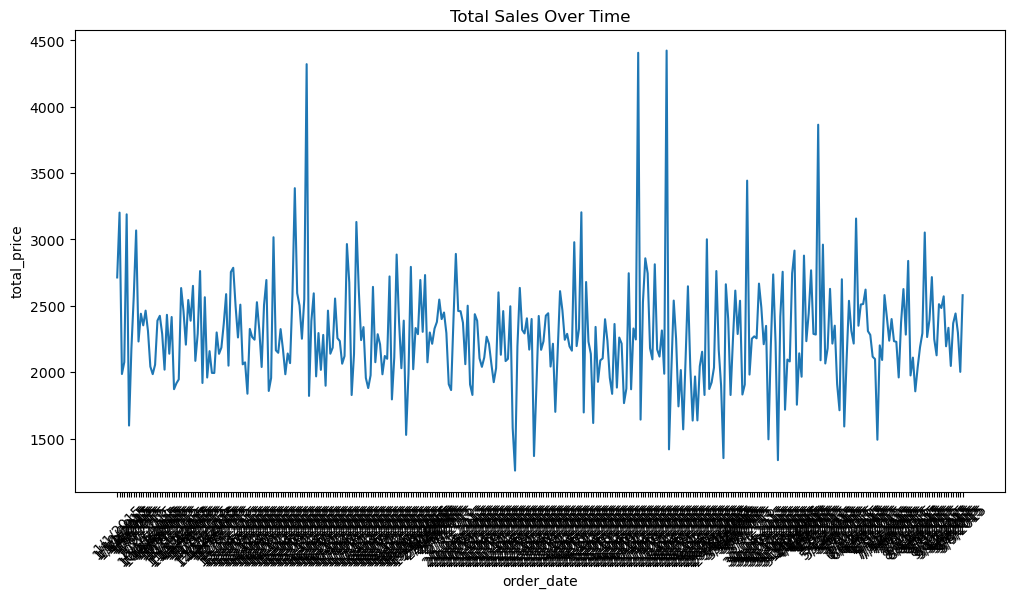

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales over time
sales_over_time = pizza_sales.groupby('order_date')['total_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='order_date', y='total_price')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Check unique values in order_date to identify any formatting issues
print(pizza_sales['order_date'].unique())


['1/1/2015' '2/1/2015' '3/1/2015' '4/1/2015' '5/1/2015' '6/1/2015'
 '7/1/2015' '8/1/2015' '9/1/2015' '10/1/2015' '11/1/2015' '12/1/2015'
 '13-01-2015' '14-01-2015' '15-01-2015' '16-01-2015' '17-01-2015'
 '18-01-2015' '19-01-2015' '20-01-2015' '21-01-2015' '22-01-2015'
 '23-01-2015' '24-01-2015' '25-01-2015' '26-01-2015' '27-01-2015'
 '28-01-2015' '29-01-2015' '30-01-2015' '31-01-2015' '1/2/2015' '2/2/2015'
 '3/2/2015' '4/2/2015' '5/2/2015' '6/2/2015' '7/2/2015' '8/2/2015'
 '9/2/2015' '10/2/2015' '11/2/2015' '12/2/2015' '13-02-2015' '14-02-2015'
 '15-02-2015' '16-02-2015' '17-02-2015' '18-02-2015' '19-02-2015'
 '20-02-2015' '21-02-2015' '22-02-2015' '23-02-2015' '24-02-2015'
 '25-02-2015' '26-02-2015' '27-02-2015' '28-02-2015' '1/3/2015' '2/3/2015'
 '3/3/2015' '4/3/2015' '5/3/2015' '6/3/2015' '7/3/2015' '8/3/2015'
 '9/3/2015' '10/3/2015' '11/3/2015' '12/3/2015' '13-03-2015' '14-03-2015'
 '15-03-2015' '16-03-2015' '17-03-2015' '18-03-2015' '19-03-2015'
 '20-03-2015' '21-03-2015' '22-03-2

In [11]:
# Attempt to convert order_date without specifying format
pizza_sales['order_date'] = pd.to_datetime(pizza_sales['order_date'], errors='coerce')

# Check if there are any NaT values after conversion
print(pizza_sales['order_date'].isnull().sum())

# Convert order_time similarly
pizza_sales['order_time'] = pd.to_datetime(pizza_sales['order_time'], format='%H:%M:%S', errors='coerce')

# Check for NaT in order_time
print(pizza_sales['order_time'].isnull().sum())


29033
0


In [12]:
# Convert order_date to string first
pizza_sales['order_date'] = pizza_sales['order_date'].astype(str)

# Check unique values again
print(pizza_sales['order_date'].unique())

# Now try to convert to datetime using the expected format
pizza_sales['order_date'] = pd.to_datetime(pizza_sales['order_date'], format='%d-%m-%Y', errors='coerce')

# Check for NaT values
print(pizza_sales['order_date'].isnull().sum())


['2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01' 'NaT' '2015-01-02' '2015-02-02' '2015-03-02'
 '2015-04-02' '2015-05-02' '2015-06-02' '2015-07-02' '2015-08-02'
 '2015-09-02' '2015-10-02' '2015-11-02' '2015-12-02' '2015-01-03'
 '2015-02-03' '2015-03-03' '2015-04-03' '2015-05-03' '2015-06-03'
 '2015-07-03' '2015-08-03' '2015-09-03' '2015-10-03' '2015-11-03'
 '2015-12-03' '2015-01-04' '2015-02-04' '2015-03-04' '2015-04-04'
 '2015-05-04' '2015-06-04' '2015-07-04' '2015-08-04' '2015-09-04'
 '2015-10-04' '2015-11-04' '2015-12-04' '2015-01-05' '2015-02-05'
 '2015-03-05' '2015-04-05' '2015-05-05' '2015-06-05' '2015-07-05'
 '2015-08-05' '2015-09-05' '2015-10-05' '2015-11-05' '2015-12-05'
 '2015-01-06' '2015-02-06' '2015-03-06' '2015-04-06' '2015-05-06'
 '2015-06-06' '2015-07-06' '2015-08-06' '2015-09-06' '2015-10-06'
 '2015-11-06' '2015-12-06' '2015-01-07' '2015-02-07' '2015-03-07'
 '20

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data
data = pd.read_csv("C:/Users/Ramanathan/Desktop/Capstone_5/Pizza_Sale - pizza_sales.csv")

# Check for missing values and drop rows with NaN in 'total_price'
data = data.dropna(subset=['total_price'])

# Assuming 'total_price' is your target variable and the rest are features
X = data.drop('total_price', axis=1)
y = data['total_price']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)


Training feature set shape: (38890, 16898)
Testing feature set shape: (9723, 16898)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error and R² Score for both training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing Mean Squared Error: {test_mse:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")


Training Mean Squared Error: 0.00
Training R² Score: 1.00
Testing Mean Squared Error: 0.00
Testing R² Score: 1.00


In [21]:
# Import necessary libraries
import pandas as pd

# Load the datasets
ingredients_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_ingredients - Pizza_ingredients.csv'
sales_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_Sale - pizza_sales.csv'

# Load the data into DataFrames
ingredients_df = pd.read_csv(ingredients_path)
sales_df = pd.read_csv(sales_path)

# Display the first few rows of the datasets
print("Ingredients Data:")
print(ingredients_df.head())

print("\nSales Data:")
print(sales_df.head())

# Check for missing values
print("\nMissing values in Ingredients Dataset:")
print(ingredients_df.isnull().sum())

print("\nMissing values in Sales Dataset:")
print(sales_df.isnull().sum())

# Handle missing values (if any) - Example: Drop rows with missing values
ingredients_df = ingredients_df.dropna()
sales_df = sales_df.dropna()

# Check for duplicates
print("\nChecking for duplicate rows...")
print(f"Duplicate rows in ingredients_df: {ingredients_df.duplicated().sum()}")
print(f"Duplicate rows in sales_df: {sales_df.duplicated().sum()}")

# Remove duplicates if found
ingredients_df = ingredients_df.drop_duplicates()
sales_df = sales_df.drop_duplicates()

# Verify the cleaned data
print("\nIngredients Data (Cleaned):")
print(ingredients_df.head())

print("\nSales Data (Cleaned):")
print(sales_df.head())


Ingredients Data:
  pizza_name_id                  pizza_name  pizza_ingredients  \
0     bbq_ckn_l  The Barbecue Chicken Pizza  Barbecued Chicken   
1     bbq_ckn_l  The Barbecue Chicken Pizza        Red Peppers   
2     bbq_ckn_l  The Barbecue Chicken Pizza      Green Peppers   
3     bbq_ckn_l  The Barbecue Chicken Pizza           Tomatoes   
4     bbq_ckn_l  The Barbecue Chicken Pizza         Red Onions   

   Items_Qty_In_Grams  
0                40.0  
1                15.0  
2                20.0  
3                30.0  
4                60.0  

Sales Data:
   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1   1/1/2015   11:38:36   
1         2         2  classic_dlx_m         1   1/1/2015   11:57:40   
2         3         2  five_cheese_l         1   1/1/2015   11:57:40   
3         4         2    ital_supr_l         1   1/1/2015   11:57:40   
4         5         2     mexicana_m         1   1/1/2015   11:57:40

In [24]:
# Verify the column names
print("Column names in the sales dataset:")
print(sales_df.columns)

# Check the first few rows to ensure the 'Date' column is present
print("\nFirst few rows of sales data:")
print(sales_df.head())

# Check the data type of the 'Date' column
print("\nData types in sales_df:")
print(sales_df.dtypes)


Column names in the sales dataset:
Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

First few rows of sales data:
   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1   1/1/2015   11:38:36   
1         2         2  classic_dlx_m         1   1/1/2015   11:57:40   
2         3         2  five_cheese_l         1   1/1/2015   11:57:40   
3         4         2    ital_supr_l         1   1/1/2015   11:57:40   
4         5         2     mexicana_m         1   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   


In [27]:
# Step 1: Check if 'Date' column is present in the dataset
print("Column names in sales dataset:")
print(sales_df.columns)

# Step 2: Check the first few rows of the dataset to confirm the 'Date' column
print("\nFirst 5 rows of the dataset:")
print(sales_df.head())


Column names in sales dataset:
Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

First 5 rows of the dataset:
   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1   1/1/2015   11:38:36   
1         2         2  classic_dlx_m         1   1/1/2015   11:57:40   
2         3         2  five_cheese_l         1   1/1/2015   11:57:40   
3         4         2    ital_supr_l         1   1/1/2015   11:57:40   
4         5         2     mexicana_m         1   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4    

In [30]:
import pandas as pd

# Load datasets
ingredients_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_ingredients - Pizza_ingredients.csv'
sales_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_Sale - pizza_sales.csv'

# Display column names
ingredients_df = pd.read_csv(ingredients_path)
sales_df = pd.read_csv(sales_path)

print("Pizza Ingredients Columns:")
print(ingredients_df.columns)

print("\nPizza Sales Columns:")
print(sales_df.columns)



Pizza Ingredients Columns:
Index(['pizza_name_id', 'pizza_name', 'pizza_ingredients',
       'Items_Qty_In_Grams'],
      dtype='object')

Pizza Sales Columns:
Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')


In [33]:
# Check the columns of the merged DataFrame
print("Merged DataFrame Columns:")
print(merged_df.columns)


Merged DataFrame Columns:
Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients_x', 'pizza_name_x', 'pizza_name_y',
       'pizza_ingredients_y', 'Items_Qty_In_Grams', 'Total_Quantity'],
      dtype='object')


In [35]:
import pandas as pd

# Load datasets
ingredients_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_ingredients - Pizza_ingredients.csv'
sales_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_Sale - pizza_sales.csv'

ingredients_df = pd.read_csv(ingredients_path)
sales_df = pd.read_csv(sales_path)

# Merge datasets on 'pizza_name_id'
merged_df = pd.merge(sales_df, ingredients_df, on='pizza_name_id')

# Use 'pizza_ingredients_y' for grouping, as it comes from the ingredients dataset
merged_df['Total_Quantity'] = merged_df['quantity'] * merged_df['Items_Qty_In_Grams']

# Group by 'pizza_ingredients_y' to get the forecasted demand
ingredient_forecast = merged_df.groupby('pizza_ingredients_y')['Total_Quantity'].sum().reset_index()

# Display the forecasted ingredient requirements
print("\nForecasted Ingredient Requirements:")
print(ingredient_forecast)

# Save the forecast to a CSV file
forecast_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_forecast.csv'
ingredient_forecast.to_csv(forecast_path, index=False)

print(f"\nForecast saved to: {forecast_path}")



Forecasted Ingredient Requirements:
        pizza_ingredients_y  Total_Quantity
0              ?duja Salami         41020.0
1             Alfredo Sauce         15265.0
2                 Anchovies         42485.0
3                Artichokes        126200.0
4                   Arugula         14625.0
..                      ...             ...
59       Sun-dried Tomatoes         18845.0
60  Thai Sweet Chilli Sauce         56660.0
61                    Thyme          2450.0
62                 Tomatoes        594140.0
63                 Zucchini         48620.0

[64 rows x 2 columns]

Forecast saved to: C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_forecast.csv


In [36]:
# Reload datasets with encoding handling
ingredients_df = pd.read_csv(ingredients_path, encoding='utf-8')
sales_df = pd.read_csv(sales_path, encoding='utf-8')

# If utf-8 doesn't work, try ISO-8859-1
# ingredients_df = pd.read_csv(ingredients_path, encoding='ISO-8859-1')
# sales_df = pd.read_csv(sales_path, encoding='ISO-8859-1')

# Merge datasets on 'pizza_name_id'
merged_df = pd.merge(sales_df, ingredients_df, on='pizza_name_id')

# Use 'pizza_ingredients_y' for grouping
merged_df['Total_Quantity'] = merged_df['quantity'] * merged_df['Items_Qty_In_Grams']

# Group by 'pizza_ingredients_y' and reset index
ingredient_forecast = merged_df.groupby('pizza_ingredients_y')['Total_Quantity'].sum().reset_index()

# Display the cleaned forecast
print("\nForecasted Ingredient Requirements:")
print(ingredient_forecast)

# Save to CSV
forecast_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_forecast.csv'
ingredient_forecast.to_csv(forecast_path, index=False)

print(f"\nForecast saved to: {forecast_path}")



Forecasted Ingredient Requirements:
        pizza_ingredients_y  Total_Quantity
0              ?duja Salami         41020.0
1             Alfredo Sauce         15265.0
2                 Anchovies         42485.0
3                Artichokes        126200.0
4                   Arugula         14625.0
..                      ...             ...
59       Sun-dried Tomatoes         18845.0
60  Thai Sweet Chilli Sauce         56660.0
61                    Thyme          2450.0
62                 Tomatoes        594140.0
63                 Zucchini         48620.0

[64 rows x 2 columns]

Forecast saved to: C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_forecast.csv


In [38]:
import pandas as pd

# Load the ingredient forecast
forecast_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_forecast.csv'
ingredient_forecast = pd.read_csv(forecast_path)

# Create a stock template with 'ingredient' and 'available_stock_in_grams'
stock_template = ingredient_forecast[['pizza_ingredients_y']].copy()
stock_template['available_stock_in_grams'] = 0  # Initialize with 0

# Save the stock template to CSV
stock_template_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_stock.csv'
stock_template.rename(columns={'pizza_ingredients_y': 'ingredient'}, inplace=True)
stock_template.to_csv(stock_template_path, index=False)

print(f"Stock template created at: {stock_template_path}")


Stock template created at: C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_stock.csv


In [39]:
import pandas as pd

# Paths to the CSV files
forecast_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_forecast.csv'
stock_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_stock.csv'  # Ensure this file is updated

# Load the forecasted ingredient requirements
ingredient_forecast = pd.read_csv(forecast_path)

# Load the current ingredient stock levels
ingredient_stock = pd.read_csv(stock_path)

# Merge forecast with current stock
purchase_df = pd.merge(ingredient_forecast, ingredient_stock, 
                       left_on='pizza_ingredients_y', right_on='ingredient', how='left')

# Calculate the quantity to order if forecast > available stock
purchase_df['quantity_to_order'] = purchase_df['Total_Quantity'] - purchase_df['available_stock_in_grams']
purchase_df['quantity_to_order'] = purchase_df['quantity_to_order'].apply(lambda x: max(x, 0))  # Ensure no negative values

# Filter only ingredients that need to be reordered
purchase_order = purchase_df[purchase_df['quantity_to_order'] > 0]

# Display the purchase order
print("\nPurchase Order:")
print(purchase_order[['ingredient', 'quantity_to_order']])

# Save the purchase order to a CSV file
purchase_order_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\purchase_order.csv'
purchase_order[['ingredient', 'quantity_to_order']].to_csv(purchase_order_path, index=False)

print(f"\nPurchase order saved to: {purchase_order_path}")



Purchase Order:
                 ingredient  quantity_to_order
0              ?duja Salami            41020.0
1             Alfredo Sauce            15265.0
2                 Anchovies            42485.0
3                Artichokes           126200.0
4                   Arugula            14625.0
..                      ...                ...
59       Sun-dried Tomatoes            18845.0
60  Thai Sweet Chilli Sauce            56660.0
61                    Thyme             2450.0
62                 Tomatoes           594140.0
63                 Zucchini            48620.0

[62 rows x 2 columns]

Purchase order saved to: C:\Users\Ramanathan\Desktop\Capstone_5\purchase_order.csv


In [42]:
# Load the sales data
sales_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_Sale - pizza_sales.csv'
sales_df = pd.read_csv(sales_path)

# Display the first few rows of the sales DataFrame
print(sales_df[['order_date']].head())


  order_date
0   1/1/2015
1   1/1/2015
2   1/1/2015
3   1/1/2015
4   1/1/2015


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data
sales_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_Sale - pizza_sales.csv'
sales_df = pd.read_csv(sales_path)

# Display the first few rows to inspect the 'order_date' column
print(sales_df[['order_date']].head())

# Convert 'order_date' to datetime using the specific format
try:
    sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], format='%m/%d/%Y', errors='coerce')
except Exception as e:
    print(f"Error converting order_date: {e}")

# Check for any rows where the conversion failed
if sales_df['order_date'].isnull().any():
    print("\nConversion failed for the following dates:")
    print(sales_df[sales_df['order_date'].isnull()])

# If the conversion is successful, proceed with analysis
if not sales_df['order_date'].isnull().any():
    # Group by 'order_date' and sum the 'quantity'
    daily_sales = sales_df.groupby('order_date')['quantity'].sum().reset_index()

    # Plotting the daily sales trend
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['order_date'], daily_sales['quantity'], marker='o', color='b')
    plt.title('Daily Sales Trend')
    plt.xlabel('Order Date')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Save the daily sales data to a CSV file for future analysis
    daily_sales_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\daily_sales.csv'
    daily_sales.to_csv(daily_sales_path, index=False)

    print(f"\nDaily sales data saved to: {daily_sales_path}")


  order_date
0   1/1/2015
1   1/1/2015
2   1/1/2015
3   1/1/2015
4   1/1/2015

Conversion failed for the following dates:
       pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
1650       1651       737      bbq_ckn_m         1        NaT   11:31:34   
1651       1652       737     thai_ckn_m         1        NaT   11:31:34   
1652       1653       738   southw_ckn_m         1        NaT   12:16:47   
1653       1654       739     big_meat_s         1        NaT   12:19:38   
1654       1655       740     cali_ckn_m         1        NaT   12:29:51   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1        NaT   21:23:10   
48616     48617     21348  four_cheese_l         1        NaT   21:23:10   
48617     48618     21348   napolitana_s         1        NaT   21:23:10   
48618     48619     21349     mexicana_l         1        NaT   22:09:54   
48619     48620     21350      bbq_ckn_s  

In [47]:
import pandas as pd

# Load the sales data
sales_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_Sale - pizza_sales.csv'
sales_df = pd.read_csv(sales_path)

# Load the ingredient data
ingredients_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\Pizza_ingredients - Pizza_ingredients.csv'
ingredients_df = pd.read_csv(ingredients_path)

# Merge sales data with ingredients data
ingredient_usage_df = pd.merge(sales_df, ingredients_df, on='pizza_name_id', how='left')

# Display the first few rows and the column names of the merged DataFrame
print(ingredient_usage_df.head())
print("\nMerged DataFrame Columns:")
print(ingredient_usage_df.columns)


   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1   1/1/2015   11:38:36   
1         1         1     hawaiian_m         1   1/1/2015   11:38:36   
2         1         1     hawaiian_m         1   1/1/2015   11:38:36   
3         2         2  classic_dlx_m         1   1/1/2015   11:57:40   
4         2         2  classic_dlx_m         1   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       13.25        13.25          M        Classic   
2       13.25        13.25          M        Classic   
3       16.00        16.00          M        Classic   
4       16.00        16.00          M        Classic   

                                 pizza_ingredients_x  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1           Sliced Ham, Pineapple, Mozzarella Cheese   
2           Sliced Ham, Pineapple, Mozzarella Cheese   
3  Pep

In [48]:
# Assuming 'pizza_ingredients_x' is the correct column name
ingredient_usage = ingredient_usage_df.groupby('pizza_ingredients_x')['quantity'].sum().reset_index()

# Display the total ingredient usage
print("\nTotal Ingredient Usage:")
print(ingredient_usage)

# Save ingredient usage to a CSV file
ingredient_usage_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_usage.csv'
ingredient_usage.to_csv(ingredient_usage_path, index=False)

print(f"\nIngredient usage data saved to: {ingredient_usage_path}")



Total Ingredient Usage:
                                  pizza_ingredients_x  quantity
0   ?duja Salami, Pancetta, Tomatoes, Red Onions, ...      5622
1   Bacon, Pepperoni, Italian Sausage, Chorizo Sau...      7656
2   Barbecued Chicken, Red Peppers, Green Peppers,...     14587
3   Brie Carre Cheese, Prosciutto, Caramelized Oni...      2940
4   Calabrese Salami, Capocollo, Tomatoes, Red Oni...     11299
5   Capocollo, Red Peppers, Tomatoes, Goat Cheese,...      8628
6   Capocollo, Tomatoes, Goat Cheese, Artichokes, ...     11544
7   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...     16570
8   Chicken, Pineapple, Tomatoes, Red Peppers, Tha...     11847
9   Chicken, Red Onions, Red Peppers, Mushrooms, A...      5916
10  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...     15328
11  Chicken, Tomatoes, Red Peppers, Spinach, Garli...      5838
12  Coarse Sicilian Salami, Tomatoes, Green Olives...     11628
13  Eggplant, Artichokes, Tomatoes, Zucchini, Red ...      6860
14  Genoa Salam

In [49]:
import pandas as pd

# Load the ingredient usage data
ingredient_usage_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_usage.csv'
ingredient_usage = pd.read_csv(ingredient_usage_path)

# Forecast future demand using a 7-day moving average
ingredient_usage['Forecasted_Quantity'] = ingredient_usage['quantity'].rolling(window=7, min_periods=1).mean()

# Display the forecasted demand
print("\nForecasted Ingredient Demand:")
print(ingredient_usage[['pizza_ingredients_x', 'Forecasted_Quantity']])

# Save the forecast to a CSV file
forecast_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\forecasted_ingredient_demand.csv'
ingredient_usage[['pizza_ingredients_x', 'Forecasted_Quantity']].to_csv(forecast_path, index=False)

print(f"\nForecasted ingredient demand saved to: {forecast_path}")



Forecasted Ingredient Demand:
                                  pizza_ingredients_x  Forecasted_Quantity
0   ?duja Salami, Pancetta, Tomatoes, Red Onions, ...          5622.000000
1   Bacon, Pepperoni, Italian Sausage, Chorizo Sau...          6639.000000
2   Barbecued Chicken, Red Peppers, Green Peppers,...          9288.333333
3   Brie Carre Cheese, Prosciutto, Caramelized Oni...          7701.250000
4   Calabrese Salami, Capocollo, Tomatoes, Red Oni...          8420.800000
5   Capocollo, Red Peppers, Tomatoes, Goat Cheese,...          8455.333333
6   Capocollo, Tomatoes, Goat Cheese, Artichokes, ...          8896.571429
7   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...         10460.571429
8   Chicken, Pineapple, Tomatoes, Red Peppers, Tha...         11059.285714
9   Chicken, Red Onions, Red Peppers, Mushrooms, A...          9820.571429
10  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...         11590.285714
11  Chicken, Tomatoes, Red Peppers, Spinach, Garli...         10810.1

In [52]:
import pandas as pd

# Load forecasted demand and stock data
forecast_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\forecasted_ingredient_demand.csv'
stock_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\ingredient_stock.csv'

forecast_df = pd.read_csv(forecast_path)
stock_df = pd.read_csv(stock_path)

# Display the column names to ensure they match
print("\nForecasted Demand Columns:")
print(forecast_df.columns)

print("\nStock Data Columns:")
print(stock_df.columns)



Forecasted Demand Columns:
Index(['pizza_ingredients_x', 'Forecasted_Quantity'], dtype='object')

Stock Data Columns:
Index(['ingredient', 'available_stock_in_grams'], dtype='object')


In [53]:
# Merge forecasted demand with stock data using correct column names
po_df = pd.merge(
    forecast_df, stock_df, 
    left_on='pizza_ingredients_x', right_on='ingredient', how='left'
)

# Handle missing stock values (if some ingredients are not in stock data)
po_df['available_stock_in_grams'].fillna(0, inplace=True)

# Calculate the quantity to order (if forecasted demand > stock level)
po_df['Order_Quantity'] = (po_df['Forecasted_Quantity'] - po_df['available_stock_in_grams']).clip(lower=0)

# Filter ingredients that require ordering
purchase_orders = po_df[po_df['Order_Quantity'] > 0]

# Display the purchase orders
print("\nPurchase Orders to be Placed:")
print(purchase_orders[['pizza_ingredients_x', 'Order_Quantity']])

# Save the purchase orders to a CSV file
po_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\purchase_orders.csv'
purchase_orders[['pizza_ingredients_x', 'Order_Quantity']].to_csv(po_path, index=False)

print(f"\nPurchase orders saved to: {po_path}")



Purchase Orders to be Placed:
                                  pizza_ingredients_x  Order_Quantity
0   ?duja Salami, Pancetta, Tomatoes, Red Onions, ...     5622.000000
1   Bacon, Pepperoni, Italian Sausage, Chorizo Sau...     6639.000000
2   Barbecued Chicken, Red Peppers, Green Peppers,...     9288.333333
3   Brie Carre Cheese, Prosciutto, Caramelized Oni...     7701.250000
4   Calabrese Salami, Capocollo, Tomatoes, Red Oni...     8420.800000
5   Capocollo, Red Peppers, Tomatoes, Goat Cheese,...     8455.333333
6   Capocollo, Tomatoes, Goat Cheese, Artichokes, ...     8896.571429
7   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...    10460.571429
8   Chicken, Pineapple, Tomatoes, Red Peppers, Tha...    11059.285714
9   Chicken, Red Onions, Red Peppers, Mushrooms, A...     9820.571429
10  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...    11590.285714
11  Chicken, Tomatoes, Red Peppers, Spinach, Garli...    10810.142857
12  Coarse Sicilian Salami, Tomatoes, Green Olives...    11

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_616\65418794.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  po_df['available_stock_in_grams'].fillna(0, inplace=True)


In [54]:
# Evaluate stock vs forecast to identify gaps and surpluses
inventory_evaluation = po_df.copy()

# Calculate Surplus/Shortage: Forecast - Available Stock
inventory_evaluation['Surplus_or_Shortage'] = (
    inventory_evaluation['available_stock_in_grams'] - inventory_evaluation['Forecasted_Quantity']
)

# Display the evaluation results
print("\nInventory Evaluation (Surplus or Shortage):")
print(inventory_evaluation[['pizza_ingredients_x', 'available_stock_in_grams', 
                            'Forecasted_Quantity', 'Surplus_or_Shortage']])

# Save the evaluation results to a CSV file
inventory_eval_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\inventory_evaluation.csv'
inventory_evaluation[['pizza_ingredients_x', 'available_stock_in_grams', 
                      'Forecasted_Quantity', 'Surplus_or_Shortage']].to_csv(inventory_eval_path, index=False)

print(f"\nInventory evaluation saved to: {inventory_eval_path}")



Inventory Evaluation (Surplus or Shortage):
                                  pizza_ingredients_x  \
0   ?duja Salami, Pancetta, Tomatoes, Red Onions, ...   
1   Bacon, Pepperoni, Italian Sausage, Chorizo Sau...   
2   Barbecued Chicken, Red Peppers, Green Peppers,...   
3   Brie Carre Cheese, Prosciutto, Caramelized Oni...   
4   Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
5   Capocollo, Red Peppers, Tomatoes, Goat Cheese,...   
6   Capocollo, Tomatoes, Goat Cheese, Artichokes, ...   
7   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...   
8   Chicken, Pineapple, Tomatoes, Red Peppers, Tha...   
9   Chicken, Red Onions, Red Peppers, Mushrooms, A...   
10  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...   
11  Chicken, Tomatoes, Red Peppers, Spinach, Garli...   
12  Coarse Sicilian Salami, Tomatoes, Green Olives...   
13  Eggplant, Artichokes, Tomatoes, Zucchini, Red ...   
14  Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...   
15  Kalamata Olives, Feta Cheese, Tomatoes,

In [55]:
# Define the critical shortage threshold
critical_threshold = 10  # Example: 10 grams

# Identify critical shortages
critical_shortages = inventory_evaluation[inventory_evaluation['available_stock_in_grams'] < critical_threshold]

# Display the critical shortages
print("\nCritical Shortages (Immediate Action Required):")
print(critical_shortages[['pizza_ingredients_x', 'available_stock_in_grams']])

# Save the critical shortages to a CSV file
critical_shortages_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\critical_shortages.csv'
critical_shortages[['pizza_ingredients_x', 'available_stock_in_grams']].to_csv(critical_shortages_path, index=False)

print(f"\nCritical shortages saved to: {critical_shortages_path}")



Critical Shortages (Immediate Action Required):
                                  pizza_ingredients_x  \
0   ?duja Salami, Pancetta, Tomatoes, Red Onions, ...   
1   Bacon, Pepperoni, Italian Sausage, Chorizo Sau...   
2   Barbecued Chicken, Red Peppers, Green Peppers,...   
3   Brie Carre Cheese, Prosciutto, Caramelized Oni...   
4   Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
5   Capocollo, Red Peppers, Tomatoes, Goat Cheese,...   
6   Capocollo, Tomatoes, Goat Cheese, Artichokes, ...   
7   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...   
8   Chicken, Pineapple, Tomatoes, Red Peppers, Tha...   
9   Chicken, Red Onions, Red Peppers, Mushrooms, A...   
10  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...   
11  Chicken, Tomatoes, Red Peppers, Spinach, Garli...   
12  Coarse Sicilian Salami, Tomatoes, Green Olives...   
13  Eggplant, Artichokes, Tomatoes, Zucchini, Red ...   
14  Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...   
15  Kalamata Olives, Feta Cheese, Tomat

In [56]:
import pandas as pd

# Load necessary data
inventory_eval_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\inventory_evaluation.csv'
purchase_order_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\purchase_orders.csv'
critical_shortage_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\critical_shortages.csv'

inventory_eval = pd.read_csv(inventory_eval_path)
purchase_orders = pd.read_csv(purchase_order_path)
critical_shortages = pd.read_csv(critical_shortage_path)

# Create a consolidated report
consolidated_report = inventory_eval.merge(purchase_orders, 
                                           on='pizza_ingredients_x', 
                                           how='left', suffixes=('_eval', '_order'))
consolidated_report = consolidated_report.merge(critical_shortages, 
                                                on='pizza_ingredients_x', 
                                                how='left', suffixes=('', '_critical'))

# Save the consolidated report to a CSV file
consolidated_report_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\consolidated_report.csv'
consolidated_report.to_csv(consolidated_report_path, index=False)

print(f"\nConsolidated report saved to: {consolidated_report_path}")
print("\nConsolidated Report:")
print(consolidated_report.head())



Consolidated report saved to: C:\Users\Ramanathan\Desktop\Capstone_5\consolidated_report.csv

Consolidated Report:
                                 pizza_ingredients_x  \
0  ?duja Salami, Pancetta, Tomatoes, Red Onions, ...   
1  Bacon, Pepperoni, Italian Sausage, Chorizo Sau...   
2  Barbecued Chicken, Red Peppers, Green Peppers,...   
3  Brie Carre Cheese, Prosciutto, Caramelized Oni...   
4  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   

   available_stock_in_grams  Forecasted_Quantity  Surplus_or_Shortage  \
0                       0.0          5622.000000         -5622.000000   
1                       0.0          6639.000000         -6639.000000   
2                       0.0          9288.333333         -9288.333333   
3                       0.0          7701.250000         -7701.250000   
4                       0.0          8420.800000         -8420.800000   

   Order_Quantity  available_stock_in_grams_critical  
0     5622.000000                                0.0 

In [57]:
# Check if any critical shortages exist
if not critical_shortages.empty:
    print("\nCritical shortages detected! Initiating automatic purchase order generation...")

    # Generate automatic POs for all critical shortages
    critical_po = critical_shortages.copy()
    critical_po['Order_Quantity'] = 1000  # Example: Order 1000 grams for each shortage

    # Display and save the automated purchase orders
    print("\nAutomated Purchase Orders:")
    print(critical_po[['pizza_ingredients_x', 'Order_Quantity']])

    auto_po_path = r'C:\Users\Ramanathan\Desktop\Capstone_5\automated_purchase_orders.csv'
    critical_po[['pizza_ingredients_x', 'Order_Quantity']].to_csv(auto_po_path, index=False)

    print(f"\nAutomated purchase orders saved to: {auto_po_path}")
else:
    print("\nNo critical shortages detected. No action needed.")



Critical shortages detected! Initiating automatic purchase order generation...

Automated Purchase Orders:
                                  pizza_ingredients_x  Order_Quantity
0   ?duja Salami, Pancetta, Tomatoes, Red Onions, ...            1000
1   Bacon, Pepperoni, Italian Sausage, Chorizo Sau...            1000
2   Barbecued Chicken, Red Peppers, Green Peppers,...            1000
3   Brie Carre Cheese, Prosciutto, Caramelized Oni...            1000
4   Calabrese Salami, Capocollo, Tomatoes, Red Oni...            1000
5   Capocollo, Red Peppers, Tomatoes, Goat Cheese,...            1000
6   Capocollo, Tomatoes, Goat Cheese, Artichokes, ...            1000
7   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...            1000
8   Chicken, Pineapple, Tomatoes, Red Peppers, Tha...            1000
9   Chicken, Red Onions, Red Peppers, Mushrooms, A...            1000
10  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...            1000
11  Chicken, Tomatoes, Red Peppers, Spinach, Garli..

       pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
1650       1651       737      bbq_ckn_m         1        NaT   11:31:34   
1651       1652       737     thai_ckn_m         1        NaT   11:31:34   
1652       1653       738   southw_ckn_m         1        NaT   12:16:47   
1653       1654       739     big_meat_s         1        NaT   12:19:38   
1654       1655       740     cali_ckn_m         1        NaT   12:29:51   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1        NaT   21:23:10   
48616     48617     21348  four_cheese_l         1        NaT   21:23:10   
48617     48618     21348   napolitana_s         1        NaT   21:23:10   
48618     48619     21349     mexicana_l         1        NaT   22:09:54   
48619     48620     21350      bbq_ckn_s         1        NaT   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
1650        16.75        16

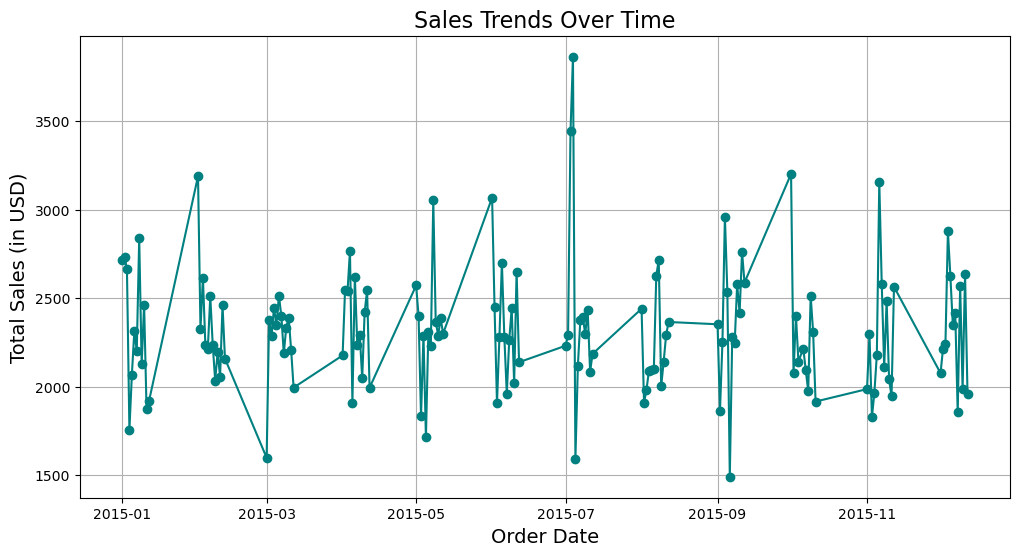

In [60]:
# Convert 'order_date' to datetime with the correct format
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], dayfirst=True, errors='coerce')

# Check if any invalid dates exist
if sales_df['order_date'].isnull().any():
    print("Warning: Some dates could not be converted. Check for invalid entries.")
    print(sales_df[sales_df['order_date'].isnull()])

# Group by order date and sum the total sales
daily_sales = sales_df.groupby('order_date')['total_price'].sum().reset_index()

# Plot sales trends over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['order_date'], daily_sales['total_price'], marker='o', color='teal')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Total Sales (in USD)', fontsize=14)
plt.grid(True)
plt.show()


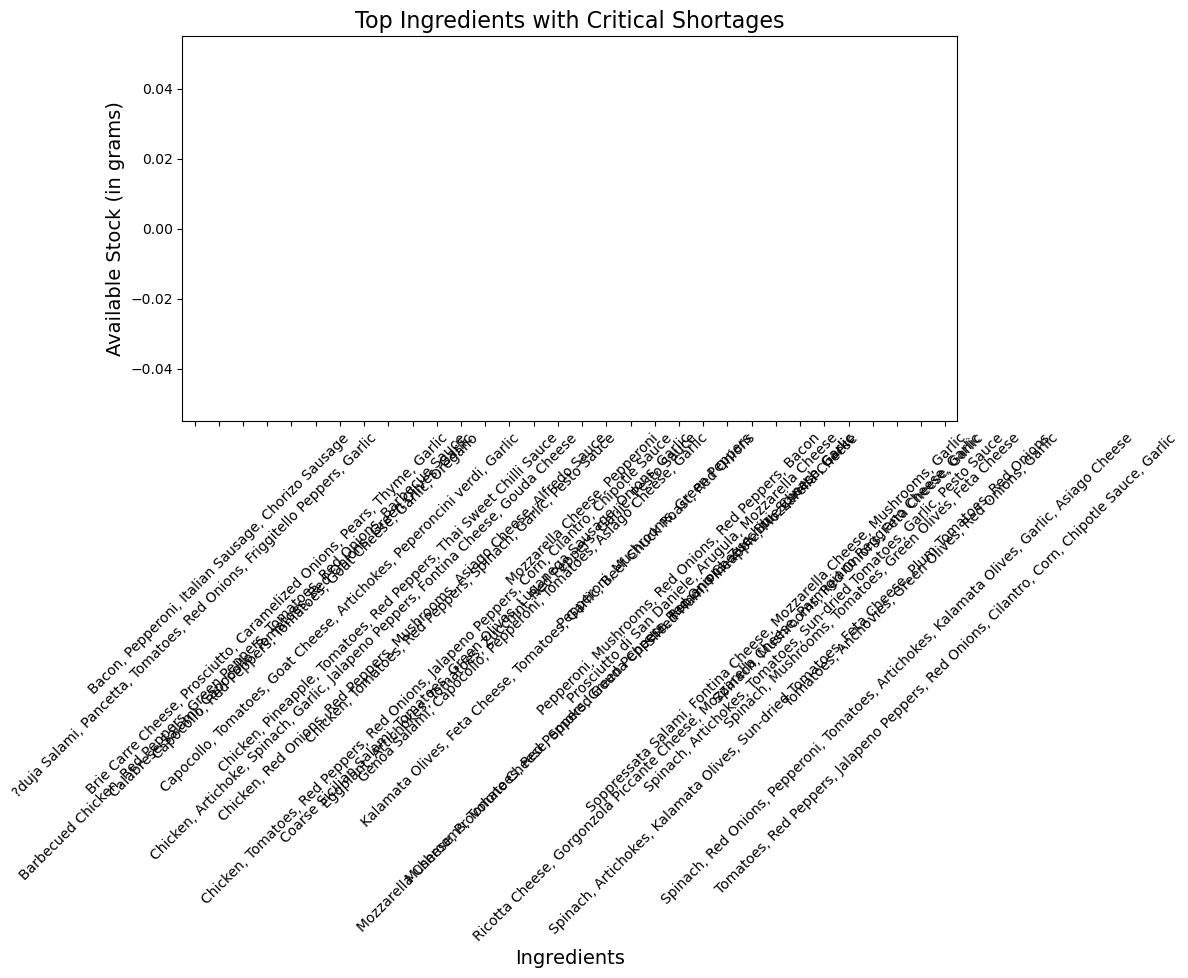

In [61]:
# Plot the top ingredients with critical shortages
if not critical_shortages.empty:
    plt.figure(figsize=(10, 5))
    critical_shortages.plot(kind='bar', x='pizza_ingredients_x', 
                            y='available_stock_in_grams', legend=False, 
                            color='crimson', ax=plt.gca())
    plt.title('Top Ingredients with Critical Shortages', fontsize=16)
    plt.xlabel('Ingredients', fontsize=14)
    plt.ylabel('Available Stock (in grams)', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No critical shortages to display.")


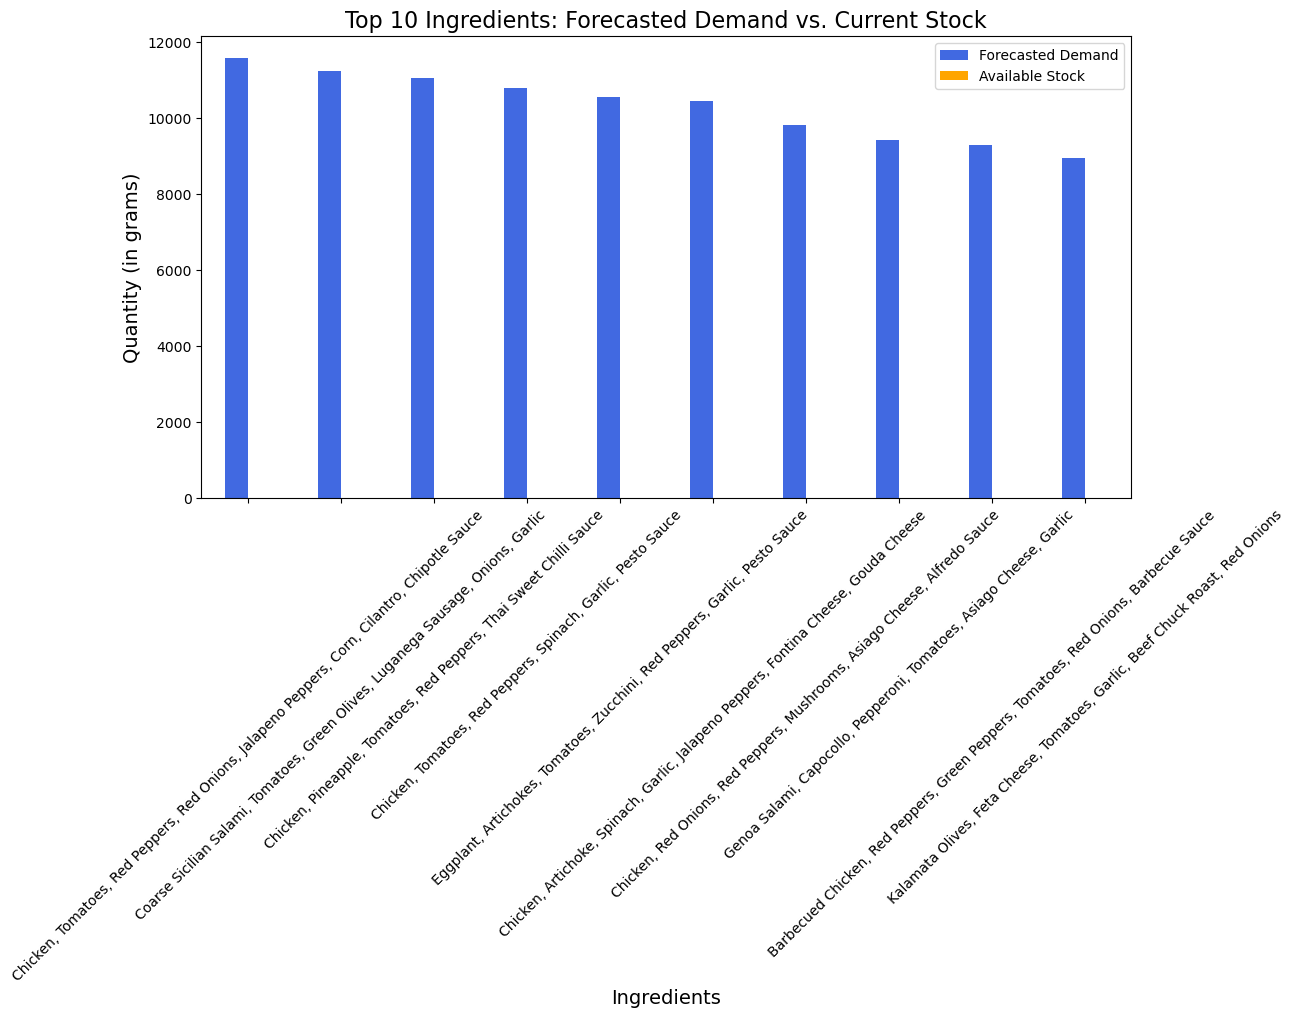

In [62]:
# Plot Forecasted Demand vs. Current Stock for Top Ingredients
top_demand = inventory_evaluation.nlargest(10, 'Forecasted_Quantity')

top_demand.plot(kind='bar', x='pizza_ingredients_x', 
                y=['Forecasted_Quantity', 'available_stock_in_grams'], 
                figsize=(12, 6), color=['royalblue', 'orange'])
plt.title('Top 10 Ingredients: Forecasted Demand vs. Current Stock', fontsize=16)
plt.xlabel('Ingredients', fontsize=14)
plt.ylabel('Quantity (in grams)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Forecasted Demand', 'Available Stock'])
plt.show()


In [2]:
# Check the column names of the forecasted demand file
print(forecasted_demand.columns)


Index(['pizza_ingredients_y', 'Total_Quantity'], dtype='object')


In [3]:
# Merge forecasted demand with ingredient stock based on the correct column names
consolidated_report = pd.merge(
    forecasted_demand, 
    ingredient_stock, 
    left_on='pizza_ingredients_y',  # Corrected column name
    right_on='ingredient', 
    how='left'
)

# Merge the consolidated report with purchase orders
consolidated_report = pd.merge(
    consolidated_report, 
    purchase_orders, 
    on='ingredient', 
    how='left'
)

# Save the consolidated report to a CSV file
consolidated_report.to_csv(
    'C:\\Users\\Ramanathan\\Desktop\\Capstone_5\\consolidated_report.csv', 
    index=False
)

print("Consolidated report successfully generated and stored!")


Consolidated report successfully generated and stored!


In [4]:
# Identify ingredients with stock shortages
critical_shortages = consolidated_report[
    consolidated_report['available_stock_in_grams'] < consolidated_report['Total_Quantity']
]

# Add a 'Shortage_Amount' column to calculate how much is required
critical_shortages['Shortage_Amount'] = (
    consolidated_report['Total_Quantity'] - consolidated_report['available_stock_in_grams']
)

# Save the critical shortages report to a CSV file
critical_shortages_path = 'C:\\Users\\Ramanathan\\Desktop\\Capstone_5\\critical_shortages.csv'
critical_shortages.to_csv(critical_shortages_path, index=False)

print("Critical shortages identified and saved successfully!")


Critical shortages identified and saved successfully!


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_17984\1825987496.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  critical_shortages['Shortage_Amount'] = (


In [5]:
# Generate purchase orders for items with shortages
purchase_orders = critical_shortages[['ingredient', 'Shortage_Amount']].copy()

# Add additional columns to the purchase order
purchase_orders['Order_Date'] = pd.Timestamp.now().strftime('%Y-%m-%d')
purchase_orders['Supplier'] = 'Default Supplier'  # You can modify as needed
purchase_orders['Status'] = 'Pending'

# Save the purchase orders to a CSV file
purchase_orders_path = 'C:\\Users\\Ramanathan\\Desktop\\Capstone_5\\purchase_orders.csv'
purchase_orders.to_csv(purchase_orders_path, index=False)

print("Automated Purchase Orders generated and saved successfully!")


Automated Purchase Orders generated and saved successfully!


In [6]:
# Generate a consolidated summary report
summary_report = pd.DataFrame({
    'Metric': ['Total Ingredients Forecasted', 'Ingredients with Shortages', 'Total Purchase Orders Generated'],
    'Value': [
        forecasted_demand.shape[0],
        critical_shortages.shape[0],
        purchase_orders.shape[0]
    ]
})

# Save the summary report to a CSV file
summary_report_path = 'C:\\Users\\Ramanathan\\Desktop\\Capstone_5\\consolidated_report.csv'
summary_report.to_csv(summary_report_path, index=False)

print("Consolidated Summary Report generated and saved successfully!")


Consolidated Summary Report generated and saved successfully!


In [9]:
# Check the forecasted data to ensure it contains the required columns
forecasted_demand = pd.read_csv('C:\\Users\\Ramanathan\\Desktop\\Capstone_5\\ingredient_forecast.csv')

# Print the columns and the first few rows to verify the content
print(forecasted_demand.columns)
print(forecasted_demand.head())


Index(['pizza_ingredients_y', 'Total_Quantity'], dtype='object')
  pizza_ingredients_y  Total_Quantity
0        ?duja Salami         41020.0
1       Alfredo Sauce         15265.0
2           Anchovies         42485.0
3          Artichokes        126200.0
4             Arugula         14625.0


In [10]:
# Check for missing values
print(forecasted_demand.isnull().sum())

# Check for duplicates
duplicates = forecasted_demand.duplicated().sum()
print(f'Duplicates: {duplicates}')


pizza_ingredients_y    0
Total_Quantity         0
dtype: int64
Duplicates: 0


In [11]:
# Display summary statistics
print(forecasted_demand.describe())


       Total_Quantity
count       64.000000
mean    140774.140625
std     203644.266854
min          0.000000
25%      37270.000000
50%      63567.500000
75%     150517.500000
max     971350.000000


In [13]:
# Print the columns to see the correct names
print(forecasted_demand.columns)

Index(['pizza_ingredients_y', 'Total_Quantity'], dtype='object')


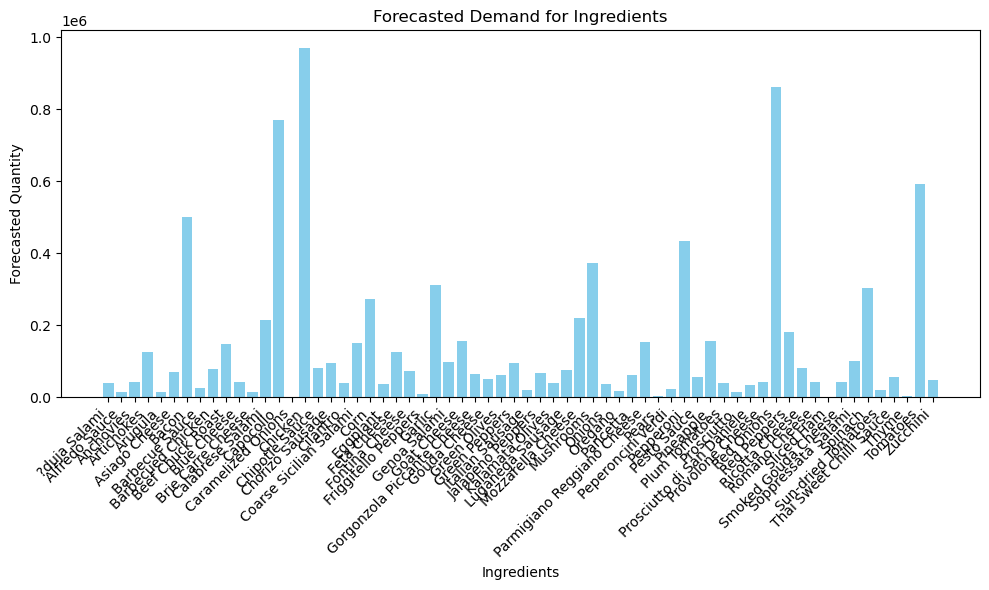

In [14]:
import matplotlib.pyplot as plt

# Using the correct column names from your DataFrame
ingredient_column = 'pizza_ingredients_y'  # Correct ingredient column
quantity_column = 'Total_Quantity'          # Correct quantity column

plt.figure(figsize=(10, 6))
plt.bar(forecasted_demand[ingredient_column], forecasted_demand[quantity_column], color='skyblue')
plt.title('Forecasted Demand for Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Forecasted Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


In [15]:
# Find the top 5 ingredients with the highest forecasted demand
top_ingredients = forecasted_demand.nlargest(5, 'Total_Quantity')
print(top_ingredients)

   pizza_ingredients_y  Total_Quantity
15             Chicken        971350.0
51          Red Onions        863620.0
13           Capocollo        771800.0
62            Tomatoes        594140.0
6                Bacon        501910.0


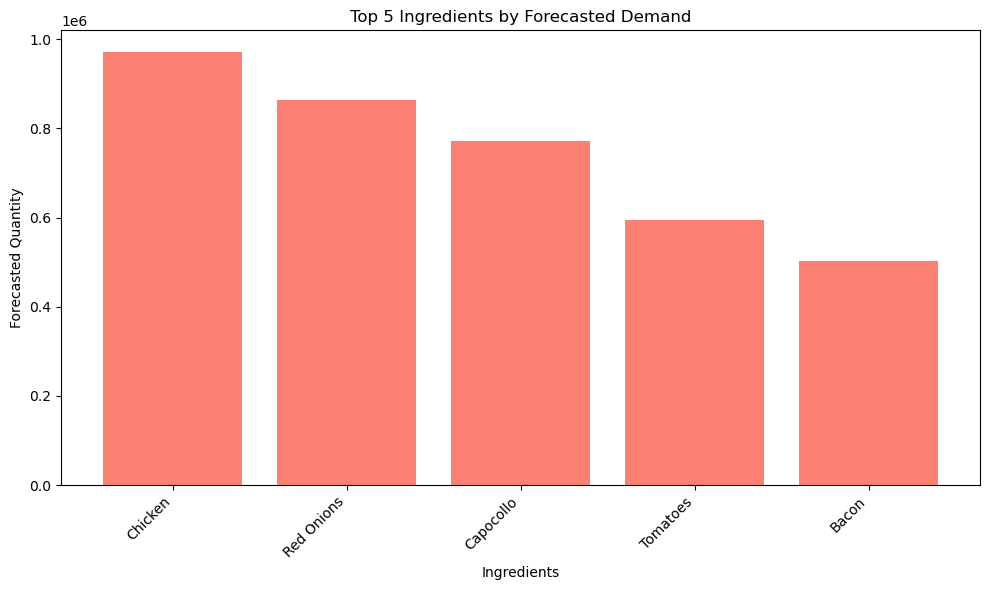

In [16]:
# Create a bar chart for the top ingredients
top_ingredients = forecasted_demand.nlargest(5, 'Total_Quantity')

plt.figure(figsize=(10, 6))
plt.bar(top_ingredients['pizza_ingredients_y'], top_ingredients['Total_Quantity'], color='salmon')
plt.title('Top 5 Ingredients by Forecasted Demand')
plt.xlabel('Ingredients')
plt.ylabel('Forecasted Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Calculate total demand for the top ingredients
total_demand = top_ingredients['Total_Quantity'].sum()
print(f'Total Forecasted Demand for Top 5 Ingredients: {total_demand}')

Total Forecasted Demand for Top 5 Ingredients: 3702820.0


In [19]:
# Sample cost data for the ingredients (you should replace this with your actual data)
# Create a DataFrame for ingredient costs
ingredient_costs = pd.DataFrame({
    'pizza_ingredients_y': ['Chicken', 'Red Onions', 'Capocollo', 'Tomatoes', 'Bacon'],
    'cost_per_unit': [2.5, 0.5, 3.0, 1.2, 1.0]  # Example costs per unit
})

# Merge with the top ingredients DataFrame
merged_data = pd.merge(top_ingredients, ingredient_costs, on='pizza_ingredients_y')

# Calculate the total cost for each ingredient
merged_data['Total_Cost'] = merged_data['Total_Quantity'] * merged_data['cost_per_unit']

# Calculate overall cost
overall_cost = merged_data['Total_Cost'].sum()

print(f'Total Projected Cost for Top 5 Ingredients: {overall_cost}')


Total Projected Cost for Top 5 Ingredients: 6390463.0


In [20]:
# Drafting a message for suppliers
supplier_message = f"""
Dear Supplier,

We are forecasting a significant demand for the following ingredients over the next period:

{top_ingredients.to_string(index=False)}

Total Forecasted Demand: {total_demand} units.

Please confirm your capacity to meet this demand and any potential pricing adjustments for bulk orders.

Thank you,
[Your Name]
[Your Position]
"""

print(supplier_message)



Dear Supplier,

We are forecasting a significant demand for the following ingredients over the next period:

pizza_ingredients_y  Total_Quantity
            Chicken        971350.0
         Red Onions        863620.0
          Capocollo        771800.0
           Tomatoes        594140.0
              Bacon        501910.0

Total Forecasted Demand: 3702820.0 units.

Please confirm your capacity to meet this demand and any potential pricing adjustments for bulk orders.

Thank you,
[Your Name]
[Your Position]



In [21]:
# Summarizing findings
summary = f"""
Total Forecasted Demand for Top 5 Ingredients: {total_demand}
Projected Cost: {overall_cost}

Top Ingredients:
{top_ingredients.to_string(index=False)}
"""

# Optionally, save the summary to a text file
with open('summary_report.txt', 'w') as f:
    f.write(summary)

print("Summary report saved as 'summary_report.txt'.")


Summary report saved as 'summary_report.txt'.


In [22]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
